## Homework 5: Mixed-effects models

In this homework we will continue analyzing the lexical decision data from Homework 4. 

We will be using the files `ldt_trials.csv` and `word_properties.csv` in the `data` folder. These files contain lexical decision reaction times for each participant and each word (`ldt_trials.csv`) and information about various word properties such as word length, word frequency, concreteness and emotional valence (`word_properties.csv`). These data were obtained from the English Lexicon Project: https://elexicon.wustl.edu/index.html

#### Part 1: Loading and organizing the data

Load the two datasets and repeat all preprocessing steps from Homework 4. You should end up with a dataset of 35978 rows.

In [1]:
changing random things to see if this keeps up to date




library(tidyverse)

ldt_trials <- read.csv('data/ldt_trials.csv')
word_properties <- read.csv('data/word_properties.csv')

df1 <- left_join(ldt_trials, word_properties, by=c("D_word"="Word"))  %>% 
    filter(!is.na(Length))

head(df1)
nrow(df1)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



,Sub_ID,Trial,Type,D_Accuracy,D_RT,D_word,Outlier,D_Zscore,Length,SUBTLWF,Concreteness_Rating,Emotional_Valence
,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,85,85,1,1,541,healthy,0,-0.849372,7,24.75,3.31,7.76
2,85,86,1,1,1215,loony,0,1.535949,5,2.41,2.15,4.48
3,85,89,1,1,677,cart,0,-0.368061,4,9.04,4.89,5.37
4,85,100,1,1,659,blunt,0,-0.431764,5,4.90,3.07,4.65
5,85,101,1,1,532,thousand,0,-0.881224,8,69.29,3.08,6.44
6,85,111,1,1,597,lyrics,0,-0.651186,6,5.08,3.86,6.42


[1] 35978

Transform the Sub_ID variable into a factor using the `as.factor()` command:

In [2]:
str(df1)

'data.frame':	35978 obs. of  12 variables:
 $ Sub_ID             : int  85 85 85 85 85 85 85 85 85 85 ...
 $ Trial              : int  85 86 89 100 101 111 119 121 124 126 ...
 $ Type               : int  1 1 1 1 1 1 1 1 1 1 ...
 $ D_Accuracy         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ D_RT               : int  541 1215 677 659 532 597 611 886 483 473 ...
 $ D_word             : chr  "healthy" "loony" "cart" "blunt" ...
 $ Outlier            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ D_Zscore           : num  -0.849 1.536 -0.368 -0.432 -0.881 ...
 $ Length             : int  7 5 4 5 8 6 7 7 5 5 ...
 $ SUBTLWF            : num  24.75 2.41 9.04 4.9 69.29 ...
 $ Concreteness_Rating: num  3.31 2.15 4.89 3.07 3.08 3.86 4.48 4.93 4.67 2.41 ...
 $ Emotional_Valence  : num  7.76 4.48 5.37 4.65 6.44 6.42 4.65 6.21 6 6.39 ...


In [3]:
#Sub_ID_factor <- as.factor(df1$Sub_ID)
#Sub_ID_factor
#str(Sub_ID_factor)


# not running because i dont understand: why do we need to transform into factor if it already is a factor(?) 

#### Part 2: Plot the effect of Length on RTs separately for each participant

In Homework 4 we saw that lexical decision RTs increase as a function of word length by approximately 26 ms per letter. This is the overall effect, but it's likely that the effect varies across participants. First, let's try to do some plots to understand this better.

First, plot the overall effect of word length on RTs. Use the `stat_summary()` command to summarize the Y variable for each X value. Then use the `geom_smooth(method='lm', se=F)` command to plot a linear regression line through the data.

`geom_smooth()` using formula 'y ~ x'



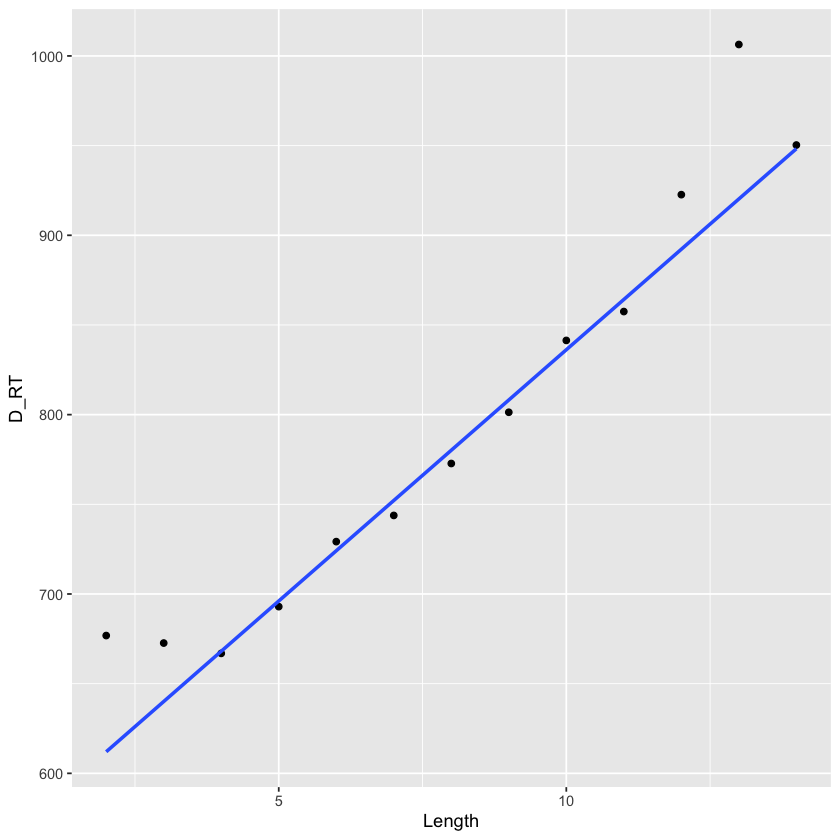

In [4]:
ggplot(df1, aes(x = Length, y = D_RT)) +
  stat_summary(fun = "mean", geom = "point") + geom_smooth(method='lm', se=F)
# plot overall effect of word length on RT

Now, let's see how much this effect varies across participants. Make the same plot, but this time in the `aes()` function add the argument `color=Sub_ID`. This will create separate regression lines in different colors for each participant.

`geom_smooth()` using formula 'y ~ x'



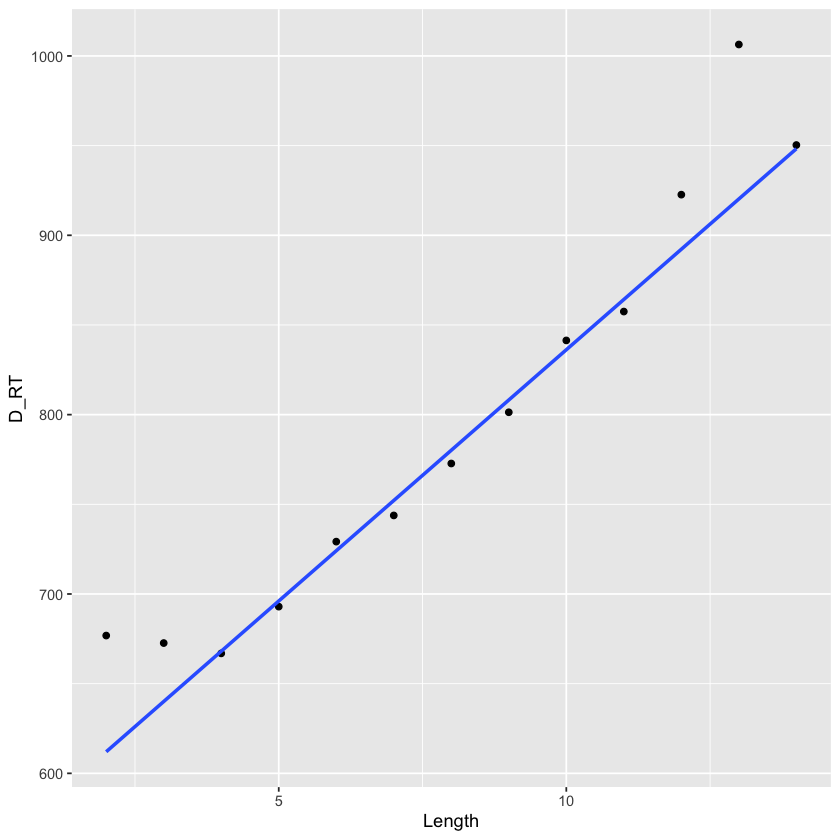

In [5]:
ggplot(df1, aes(x = Length, y = D_RT, color=Sub_ID)) +
  stat_summary(fun = "mean", geom = "point") + geom_smooth(method='lm', se=F)
# plot regression line for each subject

Describe briefly the plot above. What stands out to you?

> The effect of word length on RT seems to vary a lot between subjects. From what we can see in this crowded plot, the correlation seems to be always (at least slighty) positive (RT increases with word length), but the intercept and slope vary between subjects.

The plot above has too manyt subjects so it's a bit difficult to see them well. Just for the exercize, let's do the same plot but for a smaller subset of subjects. Filter the data so that you keep only data for subjects 8,13,50,56,62,78,82 and repeat the plot above with this filtered dataset. Which of these subjects has the lowest intercept? Which one seems to have the steepest slope?

The plot below shows us that subject 50 has the lowest intercept and subject 62 seems to have the steepest slope. However, subject 62 has some short RTs in the area of longest words, which the linear regression maybe doesn't catch well.

,Sub_ID,Trial,Type,D_Accuracy,D_RT,D_word,Outlier,D_Zscore,Length,SUBTLWF,Concreteness_Rating,Emotional_Valence
,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,8,91,1,1,593,olive,0,-1.313385,5,7.35,4.90,6.05
2,82,3227,1,1,592,tide,0,-1.328924,4,7.35,4.10,6.55
3,82,3231,1,1,1347,converse,0,0.380339,8,1.29,2.85,5.37
4,82,3233,1,1,677,tape,0,-1.136490,4,68.84,4.90,5.50
5,82,3234,1,1,740,saddle,0,-0.993863,6,7.82,4.85,4.95
6,82,3235,1,1,1188,frustrating,0,0.020375,11,2.47,1.81,2.57


[1] 2564

`geom_smooth()` using formula 'y ~ x'



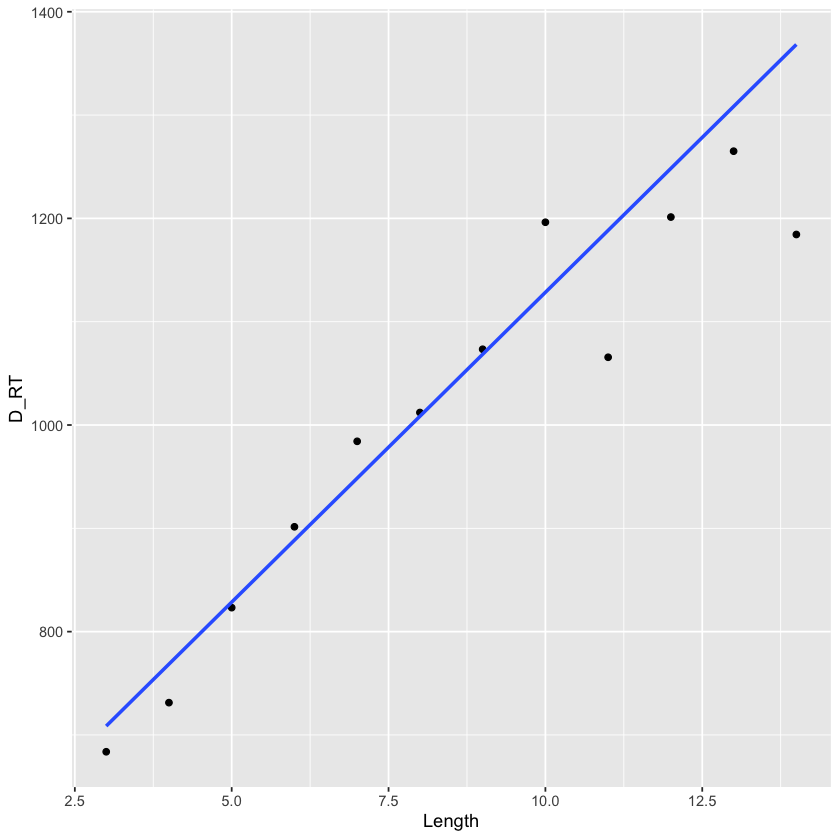

In [6]:
filtered_df <- filter(df1, Sub_ID %in% c(8,13,50,56,62,78,82))
head(filtered_df)
nrow(filtered_df)

ggplot(filtered_df, aes(x = Length, y = D_RT, color=Sub_ID)) +
  stat_summary(fun = "mean", geom = "point") + geom_smooth(method='lm', se=F)

# filter out the 7 specified subjects, look at the dataframe and plot the regression of word length on RT for each of the 7 subjects

#### Part 3: Fit separate linear regression to each subject

Before we fit a mixed-effects model, let's pretend that each subject is it's own experiment and let's fit a separate linear regression for each subject. We will then extract the intercepts and slopes for each participant's regression, and plot their distribution. The next few cells will take you step by step through this process

Create a new variable called `sub_ids` that contains the unique values of Sub_ID. This variable should have 99 unique values (you can use the `unique()` command):

In [7]:
sub_ids <- unique(df1$Sub_ID)
length(sub_ids)

[1] 99

Now we need to create a `for` loop that will fit a regression separately for each participant. We can do that step by step. Please read https://www.datacamp.com/community/tutorials/tutorial-on-loops-in-r if you are not familiar with how `for` loops work. We will create the following basic algorithm:

1. Create an empty variable to store the intercepts for each subject
2. Create an empty variable to store the slopes for each subject
3. [Loop] - for each value of sub_ids:
    - Extract the data for that subject and assign it to a temporary variable
    - Fit a regression model to the extracted data and assign the output to a temporary variable
    - Extract the intercept from the model variable, and append it to the empty intercept variable we created before
    - Extract the slope from the model variable and append it to the empty slope variable we created before

Since this is a fairly advanced use of R programming, the basic code for this is provided below, but you need to fill out some missing details:
- You will need to replace the `df1` variable with the name of your main data.frame that contains data for all subjects
- In the line `sub_ml <- ` add a linear regression of D_RT as a function of Length. Use the `sub_data` in the linear regression call as an argument for `data = `


Then run the cell below:

In [8]:
sub_intercepts <- c() # create an empty variable to store the intercepts for each subject
sub_slopes <- c() # create an empty variable to store the slopes for each subject

# loop over sub_id values
for (subject in sub_ids) {
    sub_data <- filter(df1, Sub_ID == subject)  # extract data for the subject in each loop step
    sub_ml <- lm(D_RT ~ Length, data=sub_data)  # run a regression for each subjects data
    intercept <- coef(sub_ml)[1] # extract the intercept for the subject in each loop step
    slope <- coef(sub_ml)[2] # extract the slope for the subject in each loop step
    sub_intercepts <- c(sub_intercepts, intercept) # append the intercept of this subject to the vector of intercepts for each subject
    sub_slopes <- c(sub_slopes, slope) # append the intercept of this subject to the vector of intercepts for each subject
}

Now, both `sub_intercepts` and `sub_slopes` should be vectors with 99 values each. Show their contents in the cell below:

In [9]:
length(sub_intercepts)
length(sub_slopes)
# check how many values they have

is.vector(sub_intercepts)
is.vector(sub_slopes)
# make sure the objects are indeed vectors

sub_intercepts
sub_slopes
# look at the contents

[1] 99

[1] 99

[1] TRUE

[1] TRUE

(Intercept) (Intercept) (Intercept) (Intercept) (Intercept) (Intercept) 
   598.5258    644.0770    576.8080    917.9777    551.6018    484.7978 
(Intercept) (Intercept) (Intercept) (Intercept) (Intercept) (Intercept) 
   475.4451    515.4921    521.6647    605.1807    388.4301    420.9655 
(Intercept) (Intercept) (Intercept) (Intercept) (Intercept) (Intercept) 
   451.0546    596.8696    686.9982    347.7834    472.2959    631.4396 
(Intercept) (Intercept) (Intercept) (Intercept) (Intercept) (Intercept) 
   568.0956    440.0401    469.7841    555.6093    526.0888    475.1205 
(Intercept) (Intercept) (Intercept) (Intercept) (Intercept) (Intercept) 
   536.7933    724.2329    723.2109    636.2695    643.8519    607.0846 
(Intercept) (Intercept) (Intercept) (Intercept) (Intercept) (Intercept) 
   528.5795    549.8217    531.3688    512.0511    483.8682    713.6031 
(Intercept) (Intercept) (Intercept) (Intercept) (Intercept) (Intercept) 
   460.0240    469.1171    538.9481    572.3177    523.9812    454.6047 
(Intercept) (Intercept) (Intercept) (Intercept) (Intercept) (Intercept) 
   675.2704    559.0510    463.8943    549.6207    458.8304    585.4562 
(Intercept) (Intercept) (Intercept) (Intercept) (Intercept) (Intercept) 
   498.0430    566.1324    518.7371    499.9248    653.3223    635.0193 
(Intercept) (Intercept) (Intercept) (Intercept) (Intercept) (Intercept) 
   539.4507    703.2857    448.4887    613.2598    870.5390    390.4092 
(Intercept) (Intercept) (Intercept) (Intercept) (Intercept) (Intercept) 
   469.8967    515.9155    542.5200    834.2536    612.8570    604.3975 
(Intercept) (Intercept) (Intercept) (Intercept) (Intercept) (Intercept) 
   468.6460    554.3509    504.2938    576.0525    438.5252    524.8878 
(Intercept) (Intercept) (Intercept) (Intercept) (Intercept) (Intercept) 
   428.7327    533.6793    852.9815    531.8664    486.7065    438.4972 
(Intercept) (Intercept) (Intercept) (Intercept) (Intercept) (Intercept) 
   689.0099    550.4578    584.4703    609.5492    510.0827    518.9921 
(Intercept) (Intercept) (Intercept) (Intercept) (Intercept) (Intercept) 
   599.3713    800.0535    505.3793    492.5097    354.3454    743.7038 
(Intercept) (Intercept) (Intercept) (Intercept) (Intercept) (Intercept) 
   528.1342    492.0770    445.1683    509.3814    435.8119    527.6613 
(Intercept) (Intercept) (Intercept) 
   461.1400    484.1498    651.9197

Length     Length     Length     Length     Length     Length     Length 
 13.941779  31.577920  49.909414  39.384502  11.191614  36.937776  33.357248 
    Length     Length     Length     Length     Length     Length     Length 
 31.262975  31.405133  30.366995  17.882297  33.847135  39.305037  32.732639 
    Length     Length     Length     Length     Length     Length     Length 
 41.196544  39.886670  15.310523  27.617072  78.523869  16.697642  27.163276 
    Length     Length     Length     Length     Length     Length     Length 
 24.902942  18.694572  22.649815  11.307756  16.006570  18.660510  25.301347 
    Length     Length     Length     Length     Length     Length     Length 
 48.858432   7.577499   8.740112  80.200368  29.111289  29.527534  22.700429 
    Length     Length     Length     Length     Length     Length     Length 
 63.800776  40.456199   6.055492  24.241921  32.619105  30.118336  44.298832 
    Length     Length     Length     Length     Length     Length     Length 
 54.082869  27.708759  29.118622  46.614441  39.493917   7.498995  48.608252 
    Length     Length     Length     Length     Length     Length     Length 
 33.584275  21.575097  10.061862  24.300062   6.290070 113.370232   7.015212 
    Length     Length     Length     Length     Length     Length     Length 
 44.841024  22.624846  65.452686  50.847820  28.595652   8.032788   8.839516 
    Length     Length     Length     Length     Length     Length     Length 
 22.691613  30.828953  10.092336  14.850907  18.640862  21.690829  11.392841 
    Length     Length     Length     Length     Length     Length     Length 
 77.602536  14.038855  16.406302  12.696305  42.586452  39.233780  19.301619 
    Length     Length     Length     Length     Length     Length     Length 
 20.432028  19.596245  12.667941  23.786886  42.626057  26.776270  13.902001 
    Length     Length     Length     Length     Length     Length     Length 
 22.692956  33.280311  18.753250  19.959423  10.827716  16.737237  34.251473 
    Length     Length     Length     Length     Length     Length     Length 
 12.095016  26.743899  36.044907  15.198436  20.436874  48.468859   8.717047 
    Length 
 10.694198

Let's combine `sub_ids`, `sub_intercepts` and `sub_slopes` in a new data.frame with 3 columns named `id`, `intercept` and `slope` that correspond to each of these variables. The data.frame should have 99 rows, one row for each subject. Assign the result to a new variable called `sub_lm_coefs` and show it's contents:

In [10]:
sub_lm_coefs <- cbind(sub_ids, sub_intercepts, sub_slopes)
# combine the three columns

head(sub_lm_coefs)
# couldn't find out why the (Intercept) thing appears on the left side and if i need to get rid of it or not

,sub_ids,sub_intercepts,sub_slopes
(Intercept),85,598.5258,13.94178
(Intercept),21,644.0770,31.57792
(Intercept),29,576.8080,49.90941
(Intercept),51,917.9777,39.38450
(Intercept),83,551.6018,11.19161
(Intercept),86,484.7978,36.93778


In [11]:
colnames(sub_lm_coefs) <- c("id", "intercept", "slope") 
# assign new names to the columns

nrow(sub_lm_coefs)
head(sub_lm_coefs)

sub_lm_coefs_df <- sub_lm_coefs %>% as.data.frame # convert to dataframe to use later
head(sub_lm_coefs_df) 

[1] 99

,id,intercept,slope
(Intercept),85,598.5258,13.94178
(Intercept),21,644.0770,31.57792
(Intercept),29,576.8080,49.90941
(Intercept),51,917.9777,39.38450
(Intercept),83,551.6018,11.19161
(Intercept),86,484.7978,36.93778


,id,intercept,slope
,<dbl>,<dbl>,<dbl>
X.Intercept.,85,598.5258,13.94178
X.Intercept..1,21,644.0770,31.57792
X.Intercept..2,29,576.8080,49.90941
X.Intercept..3,51,917.9777,39.38450
X.Intercept..4,83,551.6018,11.19161
X.Intercept..5,86,484.7978,36.93778


Use the `arrange()` command from the `tidyverse` package to sort the data frame first by the intercept and then by the slope. Answer the following questions:
- which subject has the slowest and which has the fastest intercept?
- which subject has the steepest and the least steep slope? Explain their slope values in terms of how word length affects RTs
- are there any subject for which Length affects RTs negatively?

In [12]:
sub_lm_coefs_df %>% arrange(desc(intercept)) # arrange the intercepts in descending order

,id,intercept,slope
,<dbl>,<dbl>,<dbl>
X.Intercept..3,51,917.9777,39.384502
X.Intercept..58,27,870.5390,65.452686
X.Intercept..74,7,852.9815,42.586452
X.Intercept..63,22,834.2536,22.691613
X.Intercept..85,31,800.0535,33.280311
X.Intercept..89,54,743.7038,16.737237
X.Intercept..25,91,724.2329,16.006570
X.Intercept..26,90,723.2109,18.660510
X.Intercept..35,96,713.6031,63.800776


> Subject 50 has the slowest intercept (917.98), subject 93 has the fastest (347.78).

In [13]:
sub_lm_coefs_df %>% arrange(desc(slope)) # arrange the slopes in descending order

,id,intercept,slope
,<dbl>,<dbl>,<dbl>
X.Intercept..54,62,539.4507,113.37023
X.Intercept..31,82,549.8217,80.20037
X.Intercept..18,8,568.0956,78.52387
X.Intercept..70,13,438.5252,77.60254
X.Intercept..58,27,870.5390,65.45269
X.Intercept..35,96,713.6031,63.80078
X.Intercept..42,78,675.2704,54.08287
X.Intercept..59,26,390.4092,50.84782
X.Intercept..2,29,576.8080,49.90941


> Subject 61 has the steepest slope (113.37), subject 1 has the least steep slope (6.06). This means that for subject 1, each additional letter increases the RT by approx. 113ms, while for subject 1, each additional letter increases RT by only approx. 6ms.
There is no subject that shows a negative correlation between word length and RT, because all slopes are positive.

Make 3 plots:
- A histogram of the intercepts for each participant
- A histogram of the slopess for each participant
- A scatterplot of the relationship between intercepts and slopes for each participant

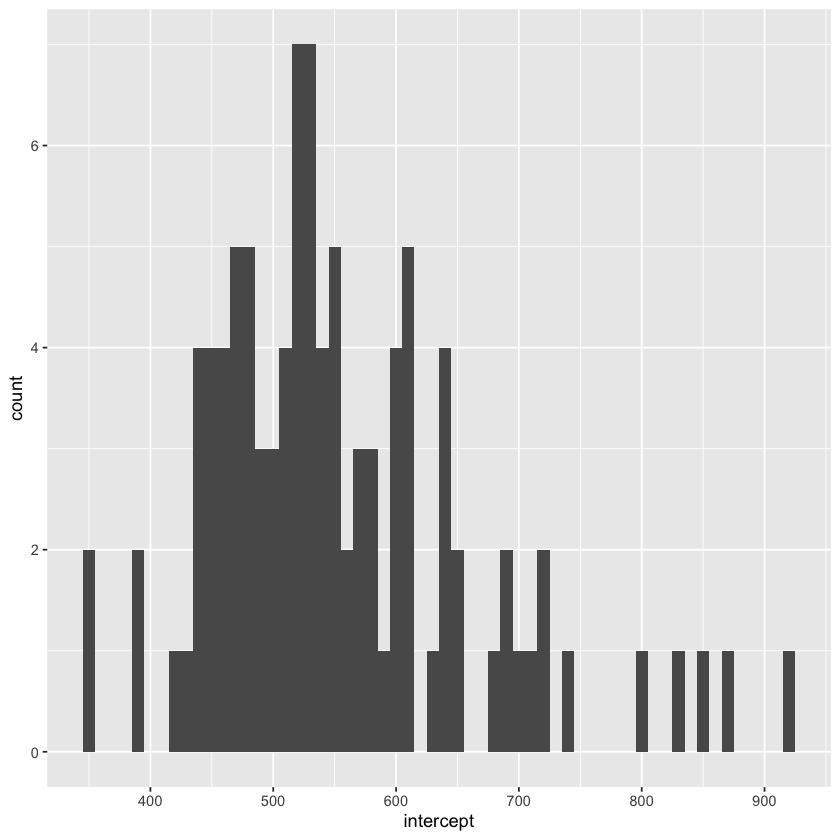

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



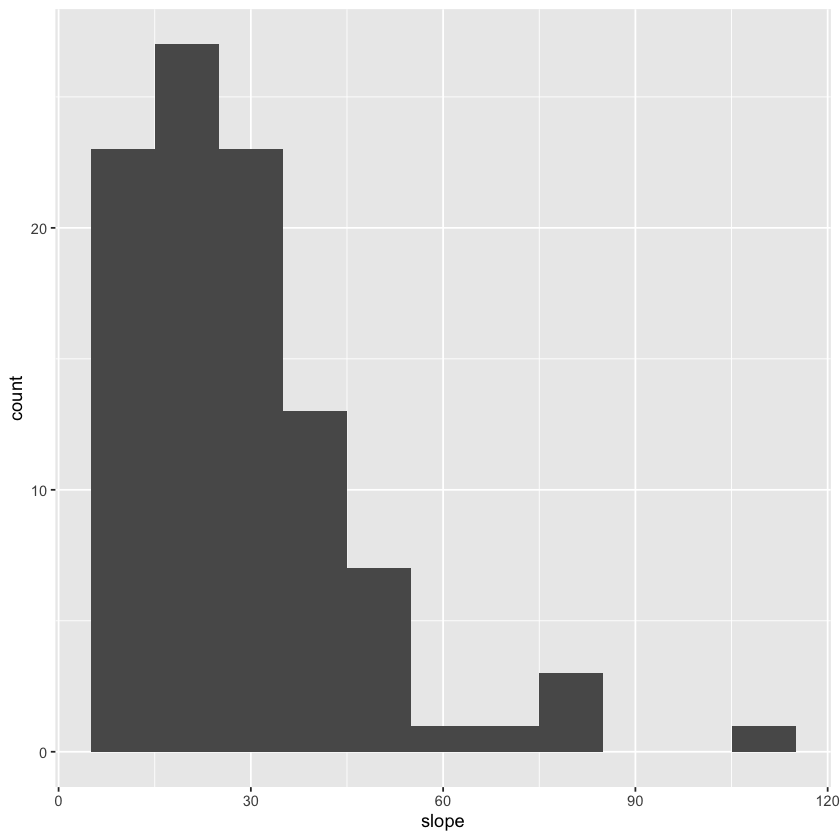

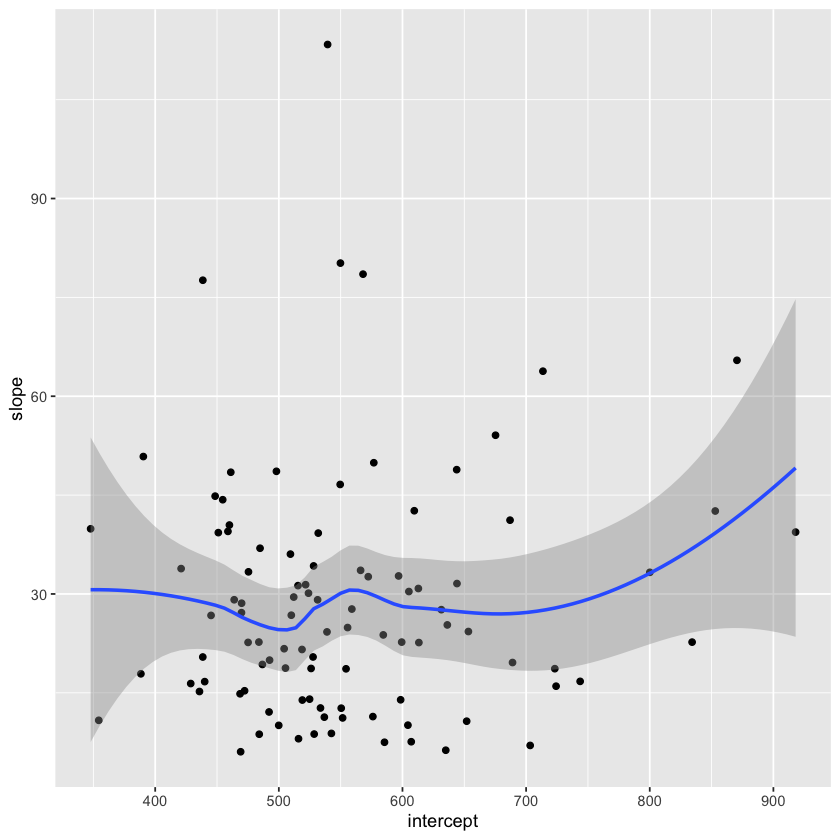

In [14]:
ggplot(sub_lm_coefs_df, aes(x=intercept)) + geom_histogram(binwidth=10)
# histogram of the intercepts for each participant

ggplot(sub_lm_coefs_df, aes(x=slope)) + geom_histogram(binwidth=10)
# histogram of the slopes for each participant

ggplot(sub_lm_coefs_df, aes(x=intercept, y=slope)) + geom_point() + geom_smooth()
# scatterplot of the relationship between intercepts and slopes for each participant

Are the intercepts and slopes normally distributed across subjects?

> Both intercepts and slopes seem to have a slightly right-skewed distribution; but they are close to a normal distribution. 

Are the intercept and slope for each subject correlated? That is, if the subject is overall slower in the task, are they more strongly affected by the word length property?

In [15]:
# the scatterplot already looks like there is no correlation, but we test this with
cor.test(~ intercept + slope, data=sub_lm_coefs_df)


	Pearson's product-moment correlation

data:  intercept and slope
t = 0.77277, df = 97, p-value = 0.4415
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1210587  0.2714427
sample estimates:
       cor 
0.07822247 


> The high p value shows us that there is no significant correlation between intercepts and slopes. We can say that a subjcet who is overall slower is not more affected by word length regarding their reaction time.

What is the mean intercept and slope over all participants?

In [16]:
sub_lm_coefs_df %>% 
   summarise(mean_intercept = mean(intercept), mean_slope = mean(slope))

mean_intercept,mean_slope
<dbl>,<dbl>
553.263,28.5922


#### Part 4: Fit a mixed-effects regression to the data

We just fit a separate regression model to the data from each participant, ignoring the data from other participants. This accounts for individual differences, but it has several drawbacks:
- it is not easy to test directly whether overall the effect of word length has an effect of RTs. The fact that all subjects showed positive slopes is an indication that this effect is overall present, but we need a more systematic way to do this
- in fitting the data of each subject, we completely ignore data from other subjects. Even though individual differences are expected, it is also reasonable to expect that people cognitive processes are similar. Thus, we are throwing away a lot of data when doing this, because we assume that one participants' parameters are not informed by data from other participants. Since we have a limited number of observations per participant, the individual parameter estimates will be more noise and more easily affected by outliers. This can lead to a biased estimation.

Both of these drawbacks can be overcome by fitting a mixture effects regression, which is a compromise between completely pooling the data, which ignores individual differences (e.g., Homework 4), and the completely separate regression for each participant, which ignores commonalities between participants and throws away data.

First, install and load the `lme4` package, which allows us to fit mixed effects regressions:

In [17]:
install.packages("lme4")
library("lme4")


The downloaded binary packages are in
	/var/folders/3n/g4p4960s3wx9bqgjvhfjz07c0000gn/T//Rtmp3UXaKV/downloaded_packages


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




Now, use the `lmer()` command to fit a simple mixed-effects linear regression model with only random intercepts for each participant (consult the tutorials you read last week for how to do this. This should be a basic regression of D_RT with only an intercept. You can use the formula `D_RT ~ 1 + (1|Sub_ID)`. Save the output to a variable called `mixed_ml0` and use the `summary()` command to display the results

In [18]:
mixed_ml0 <- lmer(D_RT ~ 1 + (1|Sub_ID), df1)
summary(mixed_ml0) 

Linear mixed model fit by REML ['lmerMod']
Formula: D_RT ~ 1 + (1 | Sub_ID)
   Data: df1

REML criterion at convergence: 518736.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1054 -0.4849 -0.1790  0.2266 10.3937 

Random effects:
 Groups   Name        Variance Std.Dev.
 Sub_ID   (Intercept)  28990   170.3   
 Residual             105643   325.0   
Number of obs: 35978, groups:  Sub_ID, 99

Fixed effects:
            Estimate Std. Error t value
(Intercept)    749.1       17.2   43.56

This simple model does not have predictors. In this case, the Intercept is merely the mean RTs overall, or what we would expect the RTs to be if all predictors are set to their mean value.

Now, let's add the effect of word length as a fixed effect to the formula. Save the results to a variable `mixed_ml1` and use `summary(mixed_ml1)` to display the results

In [19]:
mixed_ml1 <- lmer(D_RT ~ Length + (1 | Sub_ID), df1)
summary(mixed_ml1) 

Linear mixed model fit by REML ['lmerMod']
Formula: D_RT ~ Length + (1 | Sub_ID)
   Data: df1

REML criterion at convergence: 517301.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1864 -0.4869 -0.1754  0.2305 10.5000 

Random effects:
 Groups   Name        Variance Std.Dev.
 Sub_ID   (Intercept)  29082   170.5   
 Residual             101507   318.6   
Number of obs: 35978, groups:  Sub_ID, 99

Fixed effects:
            Estimate Std. Error t value
(Intercept) 555.0728    17.9537   30.92
Length       28.3131     0.7403   38.25

Correlation of Fixed Effects:
       (Intr)
Length -0.283

What are the overall intercept and slope for Length? How do you interpret these values?

>The overall intercept for length is 555.07 and the slope is 28.31. This means that this model estimates the RT to a word with zero letters (which doesn't exist, but we need a "starting value") to be 555.07 ms and the increase in RT with each added letter to be 28.31 ms. However, we need still to find out how well this model fits our data.

As you notice, there are no p-values in this output. We can use the command "anova(mixed_ml0, mixed_ml1) to perform a likelihood ratio test, and to use the Aikaike Information Criterion (AIC) to see if the mixed_ml1 model fits the data better than the mixed_ml0 model:

In [20]:
anova(mixed_ml0, mixed_ml1)
# compare fit of the two models

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mixed_ml0,3,518749.7,518775.2,-259371.9,518743.7,NA,NA,NA
mixed_ml1,4,517318.0,517351.9,-258655.0,517310.0,1433.755,1,9.716528e-314


You see that the output has two rows, one for each model. The `npar` column shows the number of parameters in the model. The AIC and BIC columns show two different indices of model fit. The best fitting model is the one with the lowest AIC. If the more complex model (ml1) has an AIC that is lower by more than 2 than the next best fitting model, we can conclude that including the Length variable improves the model. The table also provides a p-value (in scientific number notation) for the comparison between models. In this case, mixed_ml1 fits significantly better than the mixed_ml0, so word length improves the model fit and should be kept

We have only fit random intercepts for each subject, which assumes that each subject has a different baseline of RTs, but that each subject is affectedf similarly by word Length. You can extract the random effect parameters for each subject with the following command:

In [21]:
ml1_coefs <- coef(mixed_ml1)$Sub_ID
names(ml1_coefs) <- c('intercept','slope')
head(ml1_coefs)

,intercept,slope
,<dbl>,<dbl>
1,316.7377,28.31307
2,629.7282,28.31307
3,511.6176,28.31307
4,386.3402,28.31307
5,424.8326,28.31307
6,605.3286,28.31307


This table is similar to the one we constructed manually from the separate regressions; however, the slope is the same for all participants. Let's fit the model again, this time by including random slopes for Length. You can do that with the formula `D_RT ~ Length + (Length|Sub_ID)`. Save the result to the `mixed_ml2` variable and show the results using `summary()`

In [22]:
mixed_ml2 <- lmer(D_RT ~ Length + (Length|Sub_ID), df1)
summary(mixed_ml2)

Linear mixed model fit by REML ['lmerMod']
Formula: D_RT ~ Length + (Length | Sub_ID)
   Data: df1

REML criterion at convergence: 516889.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4823 -0.4734 -0.1762  0.2231 10.5560 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 Sub_ID   (Intercept)   8728.8  93.43       
          Length         277.2  16.65   0.34
 Residual             100109.4 316.40       
Number of obs: 35978, groups:  Sub_ID, 99

Fixed effects:
            Estimate Std. Error t value
(Intercept)  553.482     10.791   51.29
Length        28.560      1.828   15.62

Correlation of Fixed Effects:
       (Intr)
Length 0.085 

What are the overall intercept and slope for Length? Have they changed much relative to the model without a random slope?

>The overall intercept is now 553.48 and the slope is 28.56. Those numbers haven't really changed much compared to the last model wtihout random slopes, though the intercept is now slightly lower.

You can use the `anova()` command again to test whether the random effect improves the model fit:

In [23]:
ml2_coefs <- coef(mixed_ml2)$Sub_ID
names(ml2_coefs) <- c('intercept','slope')
head(ml2_coefs)
# check to see if now the slopes are different for each subject

,intercept,slope
,<dbl>,<dbl>
1,463.2894,7.148121
2,642.5158,26.002231
3,537.3889,24.513066
4,456.8131,18.114820
5,492.8140,18.652682
6,550.4832,36.576596


In [24]:
anova(mixed_ml1, mixed_ml2)
# compare lm1 to lm2 regarding the model fit

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mixed_ml1,4,517318.0,517351.9,-258655.0,517310.0,NA,NA,NA
mixed_ml2,6,516911.4,516962.4,-258449.7,516899.4,410.5322,2,7.146141e-90


>We can see that the AIC is lower in ml2 and that this difference is statistically signifcant, so lm2 fits the data better.

Now, finally, let us extract the random effects from this model, and compare them to the separate intercept and slopes we fit to each participant in the previous part. First, use the `coef()` command on the final model, and save the output to a variable called `mixed_lm_coefs`. Repeat all steps I showed you above in order to rename the columns with more useful names

In [25]:
mixed_lm_coefs <- ml2_coefs
mixed_lm_coefs
# rename the table I made earlier because I already did this out of curiosity

,intercept,slope
,<dbl>,<dbl>
1,463.2894,7.148121
2,642.5158,26.002231
3,537.3889,24.513066
4,456.8131,18.114820
5,492.8140,18.652682
6,550.4832,36.576596
7,789.4494,50.779813
8,626.1566,70.376563
9,518.7866,14.910488


Repeat the plots we made in the previous part, this time using the mixed-effects random effects:
- A histogram of the intercepts for each participant
- A histogram of the slopess for each participant
- A scatterplot of the relationship between intercepts and slopes for each participant

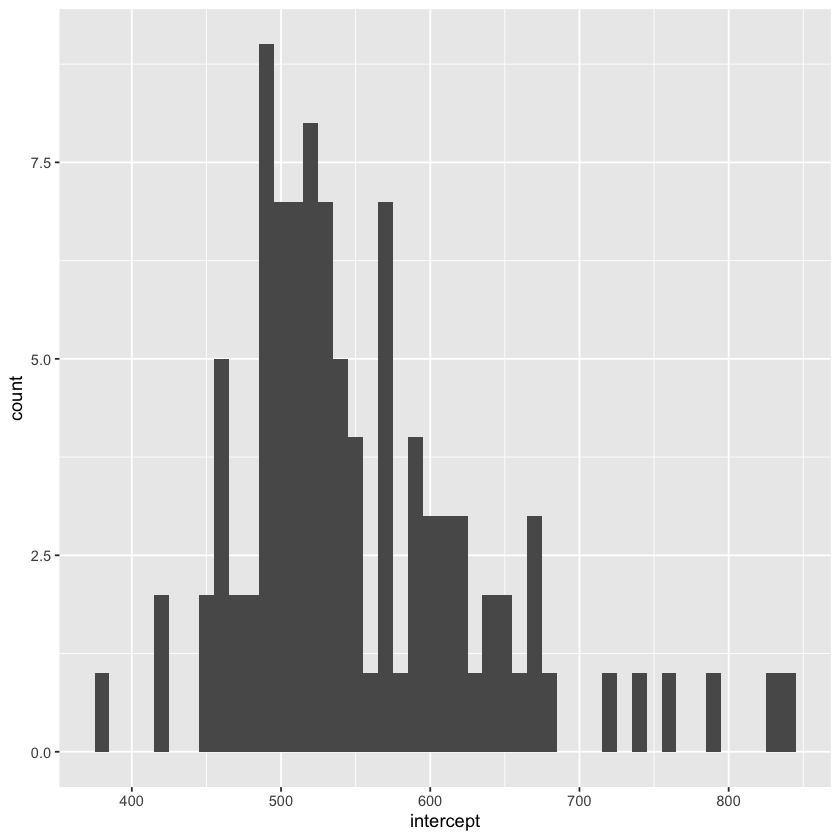

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



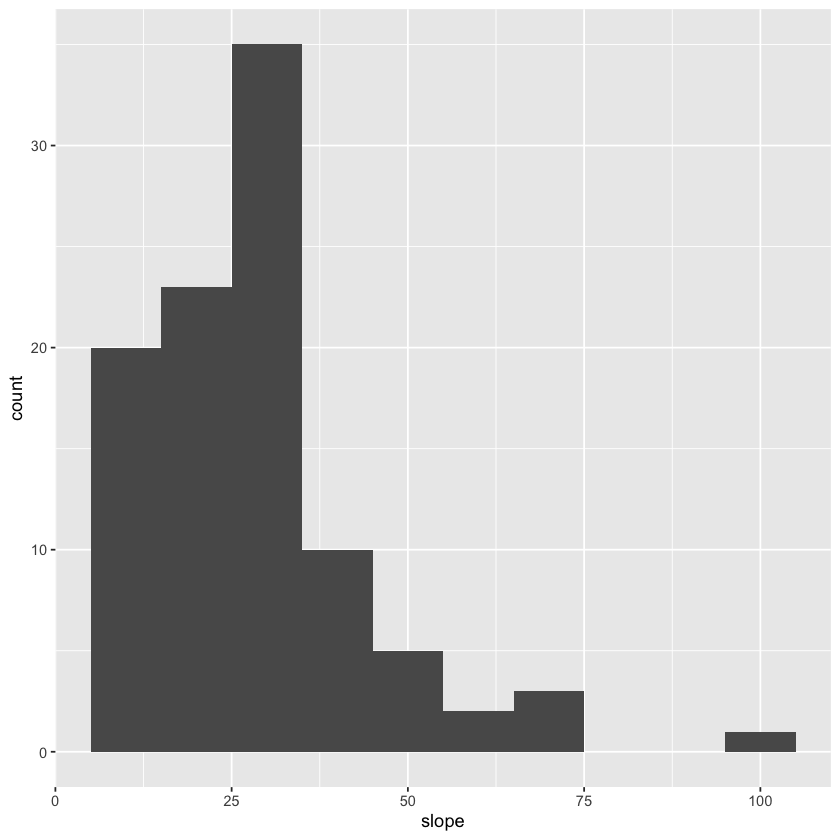

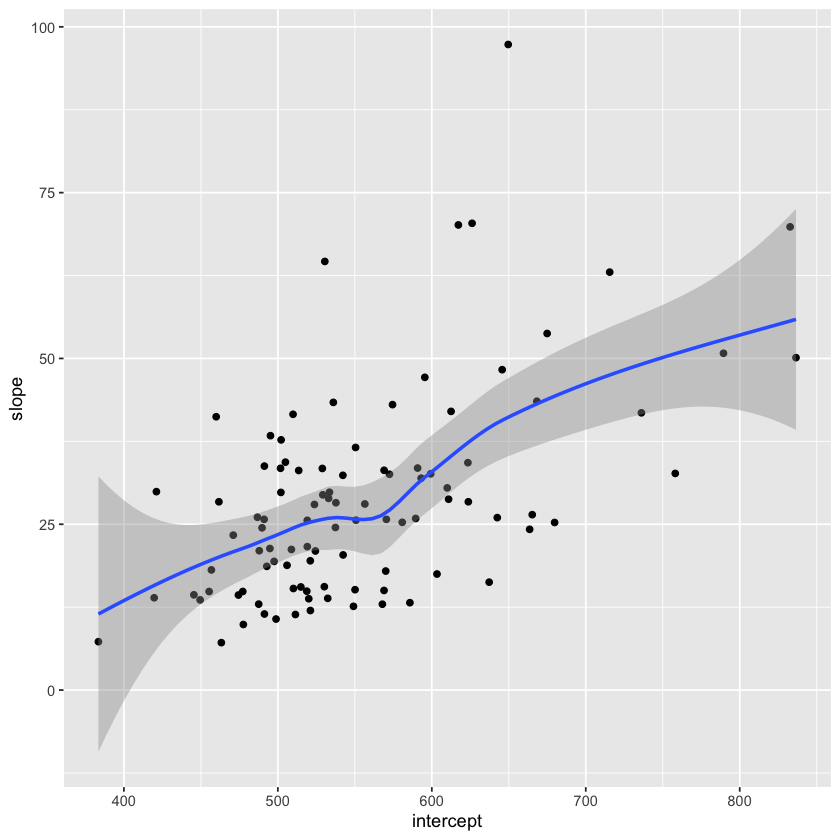

In [26]:
ggplot(mixed_lm_coefs, aes(x=intercept)) + geom_histogram(binwidth=10)
# histogram of the intercepts for each participant

ggplot(mixed_lm_coefs, aes(x=slope)) + geom_histogram(binwidth=10)
# histogram of the slopes for each participant

ggplot(mixed_lm_coefs, aes(x=intercept, y=slope)) + geom_point() + geom_smooth()

# scatterplot of the relationship between intercepts and slopes for each participant

What differences do you notice relative to the plots for the separately fit regressions? Pay attention to the values on the x-axis for the histograms. Why do you think these differences occur?

>The histograms look fairly similar, but it is noticeable that the range of the x-axis is smaller now. I suppose  this means that there are less extreme values in the data I'm using for the plot. This could be because now I'm using all data instead of only the regressions that are fit seperately (?)
The scatterplot looks very different; it seems like now there is a positive relationship between slope and intercept now.
I tested it below and there seems to be a significant positive correlation.

In [27]:
cor.test(~ intercept + slope, data=mixed_lm_coefs)


	Pearson's product-moment correlation

data:  intercept and slope
t = 6.6479, df = 97, p-value = 1.749e-09
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4070060 0.6815985
sample estimates:
     cor 
0.559466 


In the next couple of plots, I'm plotting the parameter estimates from the mixed effects model relative to the parameter estimates from the separate by-subject regressions. Each dot is a participant. The black line represents a diagonal on which parameter estimates would be equal in the two models - points under the diagonal have smaller parameter estimates in the mixed-effects model. Points above the diagonal have a larger parameter estimates in the mixed-effects regression relative to the separate by-subject regressions. What are the main patterns you notice in these plots? Can those patterns help you answer the previous question?

New names:
* intercept -> intercept...2
* slope -> slope...3
* intercept -> intercept...4
* slope -> slope...5



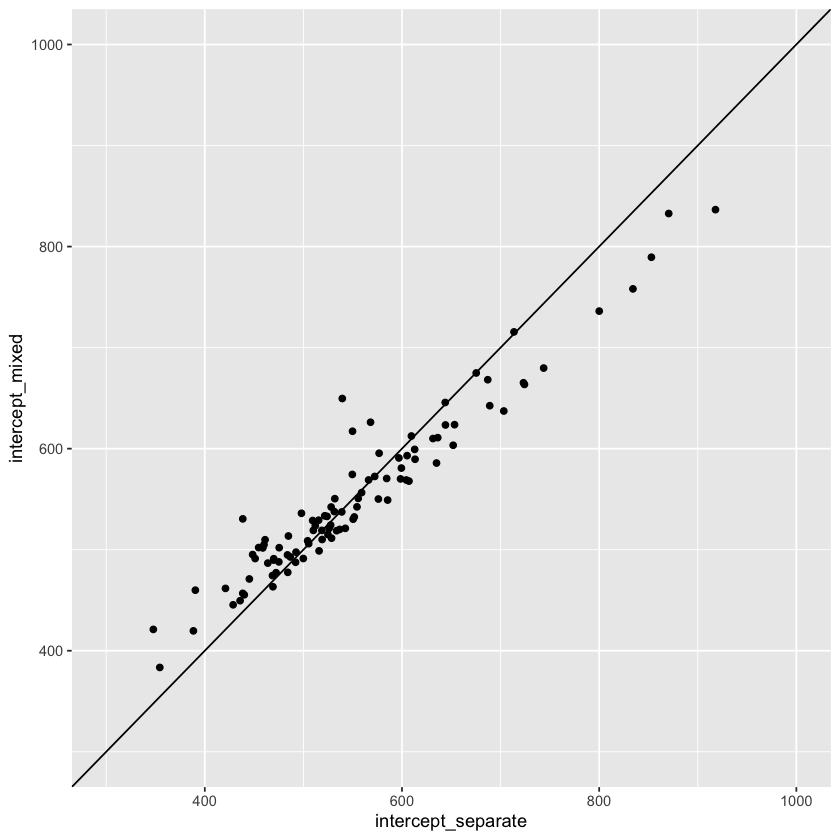

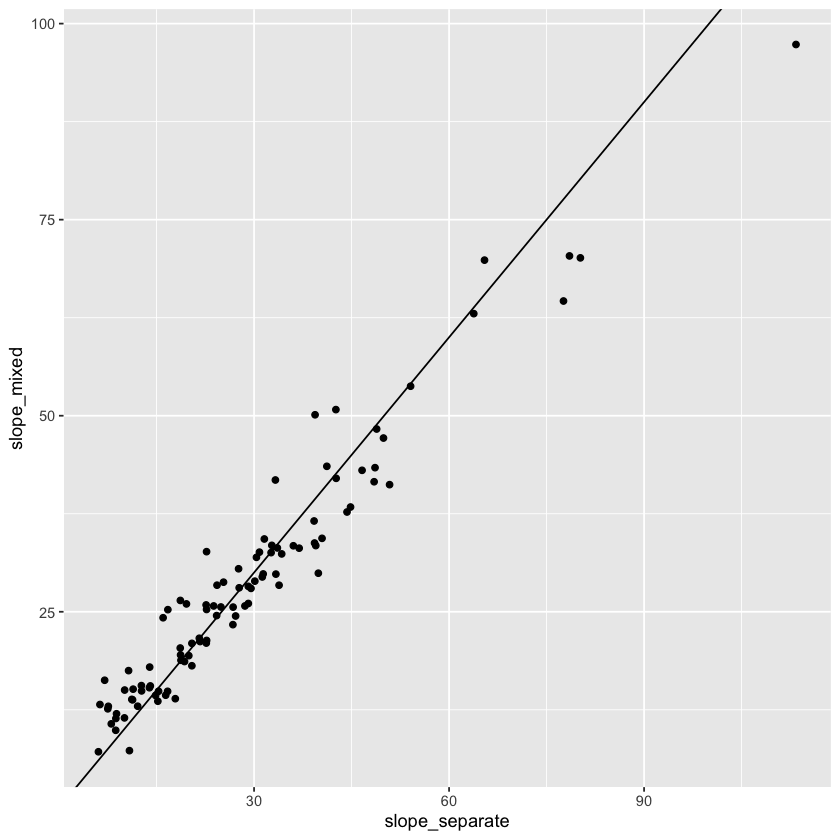

In [28]:
sub_lm_coefs_df <- arrange(sub_lm_coefs_df, id) # changed data to the dataframe I made earlier because otherwise I get an error for using a matrix
both_coefs <- bind_cols(sub_lm_coefs_df, mixed_lm_coefs) # same change
names(both_coefs) <- c('id','intercept_separate','slope_separate', 'intercept_mixed','slope_mixed')

ggplot(both_coefs, aes(intercept_separate, intercept_mixed)) +
    geom_point() +
    geom_abline(intercept=0, slope=1) +
    coord_cartesian(xlim=c(300,1000), ylim=c(300, 1000))


ggplot(both_coefs, aes(slope_separate, slope_mixed)) +
    geom_point() +
    geom_abline(intercept=0, slope=1) 


> What I can see in the plots above is that larger values are tending to be under the line, and smaller values over it (more clearly in the first plot). I'm not really sure what this could mean regarding the comparison of the mixed and separate models.